In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
AR25 = pd.read_csv('abyssalRaid25.csv')
AR26 = pd.read_csv('abyssalRaid26.csv')

In [16]:
AR25.columns

Index(['sessionId', 'userId', 'gameModeName', 'gameTime', 'userType',
       'entryTime', 'exitTime', 'duration', 'roomName', 'roomType',
       'roomSequence', 'combatRoomNumber', 'dungeonRoomNumber', 'eventType',
       'weaponName', 'total_damage', 'damage', 'ability_pyrosphere',
       'ability_minigun', 'ability_machinegun', 'ability_bomb_blackhole',
       'ability_bomb', 'ability_drone', 'ability_chakram',
       'ability_smg_gleamtwins', 'ability_kusarigama',
       'ability_chain_lightning', 'ability_ice_cube', 'ability_renew',
       'ability_healing_mark', 'enemyKills', 'PartyMembers'],
      dtype='object')

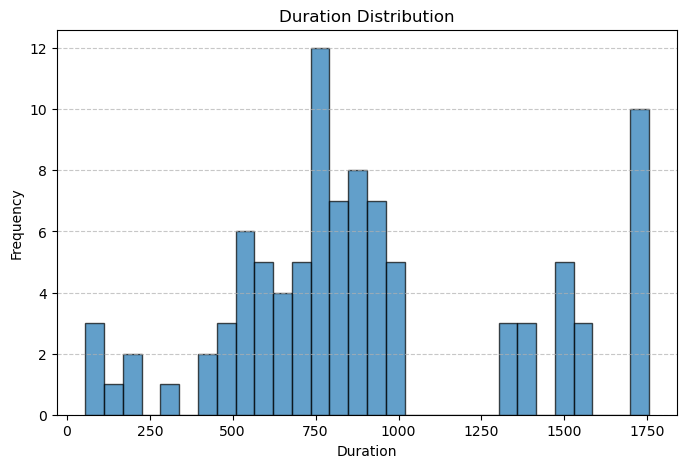

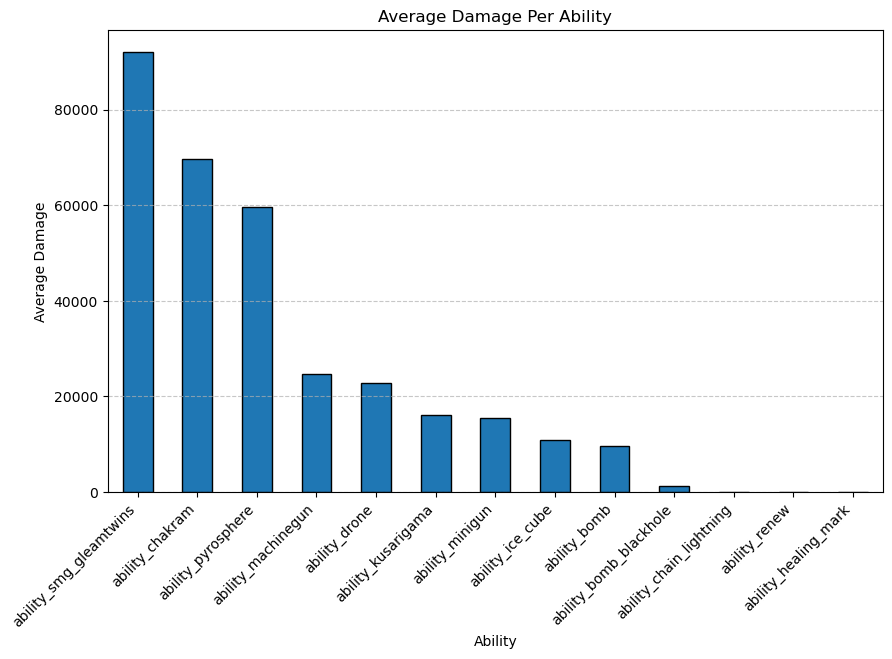

Number of unique players: 37
Total damage : 15511629.0


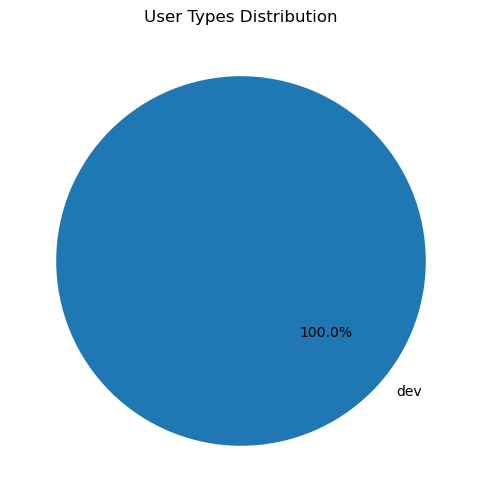

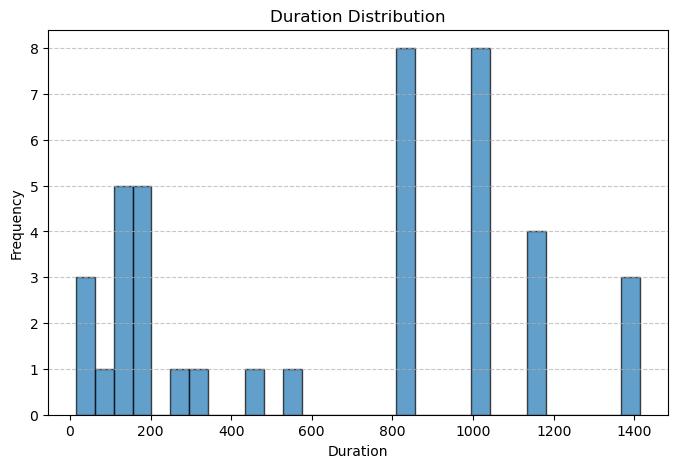

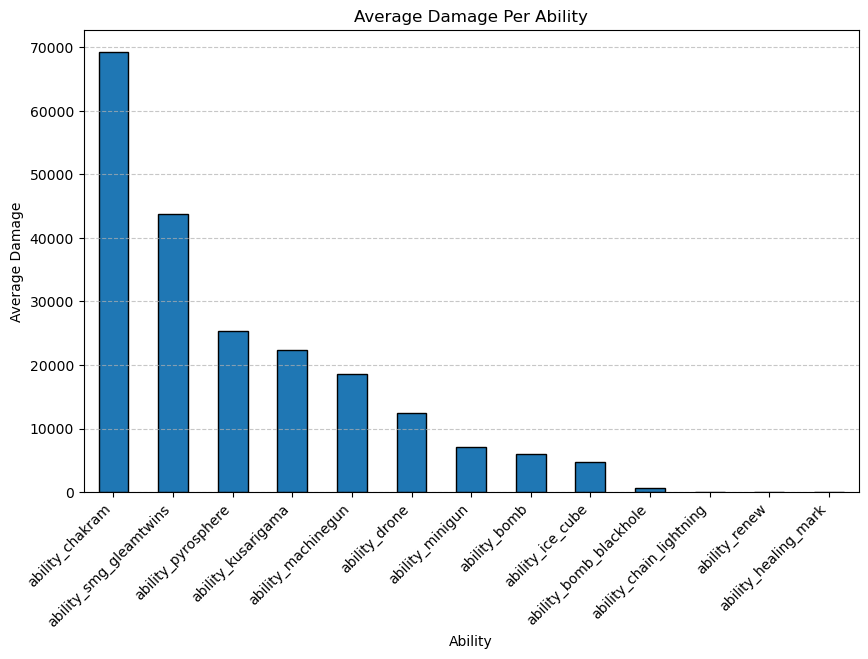

Number of unique players: 21
Total damage : 3834575.0


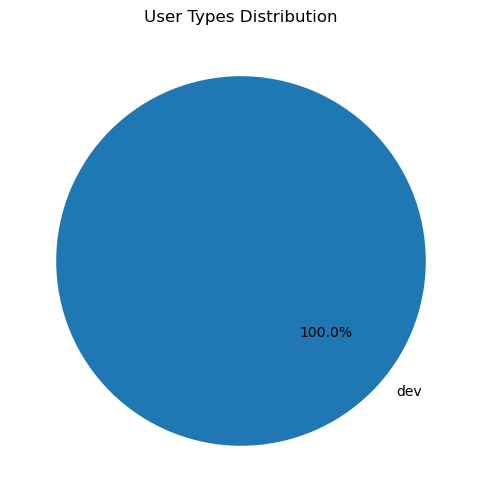

In [17]:
dfs = [AR25,AR26]
for df in dfs:

    plt.figure(figsize=(8, 5))
    plt.hist(df['duration'], bins=30, edgecolor='k', alpha=0.7)
    plt.title("Duration Distribution")
    plt.xlabel("Duration")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # 2. Average damage of each ability (grouped by userId and sessionId)
    ability_columns = [
        'ability_pyrosphere', 'ability_minigun', 'ability_machinegun',
        'ability_bomb_blackhole', 'ability_bomb', 'ability_drone',
        'ability_chakram', 'ability_smg_gleamtwins', 'ability_kusarigama',
        'ability_chain_lightning', 'ability_ice_cube', 'ability_renew',
        'ability_healing_mark'
    ]

    # Grouping by userId and sessionId and calculating the mean for each ability
    avg_damage = df.groupby(['userId', 'sessionId'])[ability_columns].mean()
    total_damage = df['total_damage'].sum()

    # Plot average damage for each ability
    avg_damage.mean().sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), edgecolor='k')
    plt.title("Average Damage Per Ability")
    plt.xlabel("Ability")
    plt.ylabel("Average Damage")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # 3. Number of unique players
    unique_players = df['userId'].nunique()
    print(f"Number of unique players: {unique_players}")
    print(f"Total damage : {total_damage}")
    # Optional visualisation: Pie chart for unique players based on userType
    user_type_counts = df['userType'].value_counts()

    plt.figure(figsize=(8, 6))
    plt.pie(user_type_counts, labels=user_type_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title("User Types Distribution")
    plt.show()